In [1]:
#using BP and White Testing for Heteroscedasticity
#going to use statsmodels for the OLS linear regression
#going to use the car models fuel economy df from breakout 3

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import matplotlib.pyplot as plt

%matplotlib inline

from win32com.client import Dispatch

In [3]:
#loading the jmp file into the environment as df

jmp = Dispatch("JMP.Application")
doc = jmp.OpenDocument("C:/Users/danley-l/Documents/TA ANLY 608/Lecture 4/car models fuel economy.jmp")
# doc.SaveAs("C:/Users/danley-l/Documents/TA ANLY 608/Lecture 4/car models fuel economy.csv")

df = pd.read_csv("C:/Users/danley-l/Documents/TA ANLY 608/Lecture 4/car models fuel economy.csv")
print(df.describe())

AttributeError: 'NoneType' object has no attribute 'SaveAs'

In [4]:
model1 = smf.ols(formula = 'Cmpg ~ Eng', data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cmpg   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          1.67e-107
Time:                        07:36:34   Log-Likelihood:                -727.57
No. Observations:                 351   AIC:                             1459.
Df Residuals:                     349   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7994      0.298     93.210      0.0

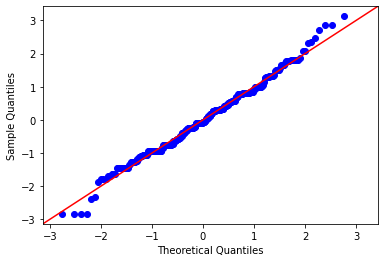

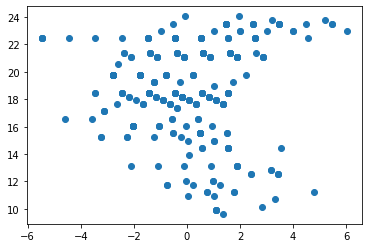

In [9]:
resid1 = model1.resid
fitted1 = model1.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid1,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted1,resid1)

In [9]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid1,model1.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid1,model1.model.exog)

In [10]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df1 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df1)

Breusch-Pagan Test and White LM Tests for Heteroscedasticity
             Test Type     Chi-Sq  DF   Prob>Chi-Sq
0  Koenkar-Basset Test  13.003549   2  3.109012e-04
1           White Test  41.592622   4  9.295589e-10


In [13]:
model2 = smf.ols(formula = 'Cmpg ~ Inv_eng', data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cmpg   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1374.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          4.56e-123
Time:                        07:45:23   Log-Likelihood:                -691.56
No. Observations:                 351   AIC:                             1387.
Df Residuals:                     349   BIC:                             1395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7028      0.260     37.302      0.0

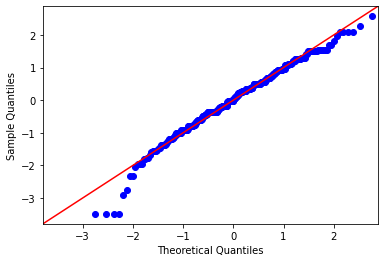

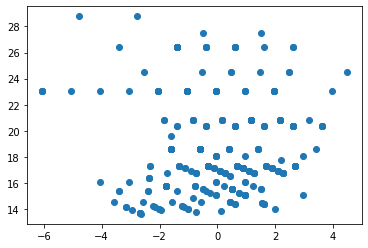

In [14]:
resid2 = model2.resid
fitted2 = model2.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid2,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(fitted2,resid2)


In [15]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid2,model2.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid2,model2.model.exog)

In [16]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df2 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df2)

Breusch-Pagan Test and White LM Tests for Heteroscedasticity
            Test Type     Chi-Sq  DF  Prob>Chi-Sq
0  Breusch-Pagan Test  10.740164   2     0.001048
1          White Test  12.586630   4     0.001849


In [18]:
df["Inv_cmpg"] = 1/df["Cmpg"] 

In [23]:
model3 = smf.ols(formula = 'Inv_cmpg ~ Inv_eng', data = df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Inv_cmpg   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     744.7
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           1.41e-88
Time:                        07:54:20   Log-Likelihood:                 1257.6
No. Observations:                 351   AIC:                            -2511.
Df Residuals:                     349   BIC:                            -2503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0815      0.001     80.845      0.0

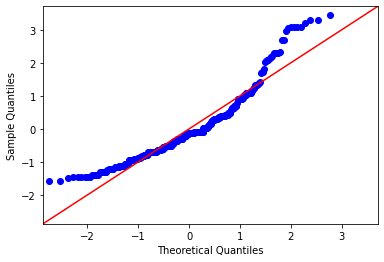

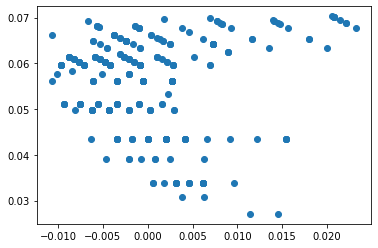

In [24]:
resid3 = model3.resid
fitted3 = model3.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid3,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(resid3, fitted3)

In [25]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid3,model3.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid3,model3.model.exog)

In [26]:
print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df3 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df3)

Breusch-Pagan Test and White LM Tests for Heteroscedasticity
            Test Type     Chi-Sq  DF   Prob>Chi-Sq
0  Breusch-Pagan Test  18.780202   2  1.466819e-05
1          White Test  66.271349   4  4.067798e-15


In [29]:
df["lncmpg"] = np.log(df["Cmpg"])
df["lneng"] = np.log(df["Eng"])

                            OLS Regression Results                            
Dep. Variable:                 lncmpg   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1434.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          1.23e-125
Time:                        07:58:29   Log-Likelihood:                 339.77
No. Observations:                 351   AIC:                            -675.5
Df Residuals:                     349   BIC:                            -667.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4866      0.016    217.072      0.0

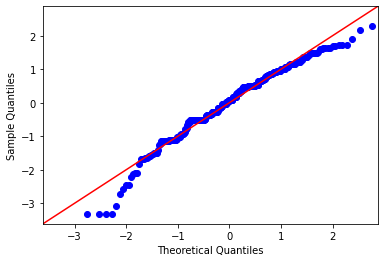

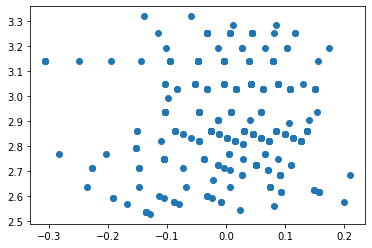

In [31]:
model4 = smf.ols(formula = 'lncmpg ~ lneng', data = df).fit()
print(model4.summary())
resid4 = model4.resid
fitted4 = model4.fittedvalues
#QQ plot of residuals
fig1 = sm.qqplot(resid4,fit=True,line='45')
#fitted v. residuals
fig, ax = plt.subplots()
_ = ax.scatter(resid4, fitted4)

# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid4,model4.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid4,model4.model.exog)

print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df4 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df4)

In [32]:
# Breusch-Pagan Test for Heteroscedasticity
bptest = sms.diagnostic.het_breuschpagan(resid4,model4.model.exog)
# White Test for Heteroscedasticity, including squares and cross-product of exog
white_test = sms.diagnostic.het_white(resid4,model4.model.exog)

print('Breusch-Pagan Test and White LM Tests for Heteroscedasticity')
df4 = pd.DataFrame({'Test Type':['Breusch-Pagan Test', 'White Test'],
                   'Chi-Sq':[bptest[0], white_test[0]], 'DF':[2, 4],
                   'Prob>Chi-Sq':[bptest[1], white_test[1]]})
print(df4)

Breusch-Pagan Test and White LM Tests for Heteroscedasticity
            Test Type    Chi-Sq  DF  Prob>Chi-Sq
0  Breusch-Pagan Test  1.470245   2     0.225307
1          White Test  9.167705   4     0.010215
